# 0) 50 shades of binary search

### i) Basic

Return index of any matching value in array, or -1.

*Note 1*: The while loop continues even when ```left == right```. Example:

Say we look for 7:

... - 3 - 7 - ...  
... - L - R - ...

In the above configuration, `mid` becomes `left` because the int divison rounds down. It's only at the next step of the while loop that `mid` can become `right`.

*Note 2*: the `left` and`right` pointers are bound to cross because either one of them moves at each step of the while loop.

In [1]:
# Basic
# Return index of any matching value in array, or -1

from typing import List, Tuple

def binary_search(array: List[int], target: int) -> int:
    left, right = 0, len(array)-1

    while left <= right:
        mid = (left + right) // 2 # No overflow in Python
        if array[mid] > target:
            right = mid - 1
        elif array[mid] < target:
            left = mid + 1
        else:
            return mid
    return -1

### ii) Duplicates: leftmost and righmost index

In [2]:
# Duplicates

def binary_search_tips(array: List[int], target: int, type : str = 'leftmost') -> int:
    left, right, index = 0, len(array)-1, -1

    while left <= right:
        mid = (left + right) // 2 # No overflow in Python
        if array[mid] > target:
            right = mid - 1
        elif array[mid] < target:
            left = mid + 1
        else:
            index = mid
            if type == 'leftmost':
                right = mid - 1
            if type == 'rightmost':
                left = mid + 1
    return index

def binary_search_duplicates(array: List[int], target: int) -> Tuple[int]:
    return binary_search_tips(array, target, 'leftmost'), binary_search_tips(array, target, 'rightmost')

### iii) Bisect: a more general approach

Bisect left (resp. right): returns the leftmost (resp. rightmost) index of matching value(s), or the index where the target value should be inserted.

Bisect returns outer indexes instead of the middle index. The outer indexes become equal in the last step of the while loop, since their difference decreases by at least 1 unit at each step:
* First `if` clause: the left index is shifted by 1 unit or more, since `left <= mid`
* Second `if` clause: `mid < right` since int division `//` rounds down in Python

Bisect left returns $min \{ i, array[i] \geq target \}$

Justification of the `if` clauses:
* `array[mid] < target`: `mid` cannot be the seeked index, since we look for the 'first' element $\geq$ target
* `else` condition i.e `array[mid] >= target`: `mid` could be the index we're looking for. Keep it for now and check elements on the left part of the array.

[Alternative implementation](https://gist.github.com/py-in-the-sky/e84fd9fc4db0da3f351631ba04b2d91b)

In [3]:
def bisect_left(array: List[int], target: int) -> int:
    left, right = 0, len(array)
    while left < right: # Strict inequality because `left == right` in the last step is guaranteed
        mid = (left + right) // 2
        if array[mid] < target:
            left = mid + 1 # `mid` cannot be the correct index, shift `left`` on its right
        else:
            right = mid # `array[mid] <= left`, so it could be to correct index
    return left # `right` works too

Bisect right returns $min \{ i, array[i] > target \}$, so it is just about turning the strict inequality into a large one:

In [4]:

def bisect_right(array: List[int], target: int) -> int:
    left, right = 0, len(array)
    while left < right:
        mid = (left + right) // 2
        if array[mid] <= target:
            left = mid + 1
        else:
            right = mid
    return left

def binary_insert(array: List[int], target: int) -> None:
    array.insert(bisect_left(array, target), target)
    return

def bisect_search(array: List[int], target: int, type : str = 'leftmost') -> int:
    index = bisect_left(array, target)
    if index < len(array) and array[index] == target:
        return index
    else:
        return -1

**Note that the right pointer is initialized as `len(array)`, not `len(array) - 1`**. This allows the returned value to be `len(array)`, in case it should be used for appending a value at the end of the array.

# 1) Trees

*Ordered trees*: a tree is ordered where children of every node are ordered.

## Depth/Height

### Depth

The depth of a node is the number of its ancestor (excluding the node itself).

<pre>
a
├── b
├── c
    ├── d
    ├── e
</pre>  

*The depth of node d is 2.*

The depth can be computed recursively:

In [16]:
def depth(node):
    if node.isroot():
        return 0
    else:
        return 1 + depth(node.parent())

```depth()``` has a O(depth(node)) time complexity for a given node. Hence the worst-case time complexity is O(n) since a one-branch tree would yield a leaf with depth n-1.

### Height

The height of a **node** is defined as:
* height(node) = 1 + max({height(child) | child ∈ children of node}) if the node is not a leaf
* height(node) = 0 if the node is a leaf

The height of a **tree** is the height of its root. Note that height(T) = max({depth(L) | L ∈ Leaves of T})

In [17]:
def height_suboptimal(T):
    return max((depth(node) for node in T.nodes() if node.is_leaf()))

The above algorithm runs in O(n<sup>2</sup>) worst-case time: listing the nodes can be done in O(n) worst-case time and computing the depth of all the leaves has a O(n<sup>2</sup>) worst-case time complexity (see page 309 and [here](https://cs.stackexchange.com/questions/87336/maximum-sum-of-depths-of-all-external-nodes-in-a-binary-tree) for details).

Example of a tree for which computing all the leaves' depths would be n<sup>2</sup>/4 = O(n<sup>2</sup>):

<pre>
a<sub>1</sub>
├── a<sub>2</sub>
    ...
        ├── a<sub>n/2</sub>
            ├── b<sub>1</sub>
            ├── b<sub>2</sub>
            ...
            ├── b<sub>n/2</sub>
</pre>

On the other hand, using the recursive definition of the height yields a O(n) worst-case running time:

In [18]:
def height_optimal(node):
    if node.is_leaf():
        return 0
    else:
        return 1 + max((height_optimal(child) for child in node.children()))


# 2) Binary trees

A binary tree is an **ordered** tree with **at most** 2 children per node, labeled left child/right child. The order is left child then right child.

A binary tree is said to be **proper** if each node has either 0 or 2 children.

A **level** d is the set of all nodes that have a depth d. A given level d has at most 2<sup>d</sup> nodes.

## Tree Traversal Algorithms

In [19]:
### Preorder traversal
def preorder(T, p):
    T.visit(p)
    for c in T.children(p):
        preorder(T, c)

### Postorder traversal
def postorder(T, p):
    for c in T.children(p):
        postorder(T, c)
    T.visit(p)

### Breadth-first traversal
def breadthfirst(T):
    Q=Queue()
    Q.enqueue(T.root())
    while not Q.is_empty():
        p=Q.dequeue()
        p.visit()
        for c in T.children(p):
            Q.enqueue(c)

### Inorder traversal
# Specific to binary trees
def inorder(T, p):
    if p.left():
        inorder(p.left())
    p.visit()
    if p.right():
        inorder(p.right())

# 3) Binary Search Trees (BST)

A BST is a binary tree with a sorted property: for each node, the left **subtree**'s values are less than the node's value and the right **subtree**'s values are greater than the node's value.

Generally speaking, BST do not contain duplicate values.

In [1]:
class Node:
    def __init__(self, val = None):
        self.val = val
        self.left = None
        self.right = None

def search(root, target):
    '''Return True if BST contains `target`, False otherwise'''
    if not root:
        return False

    if target > root.val:
        return search(root.right, target)
    elif target < root.val:
        return search(root.left, target)
    else:
        return True

The time complexity of ```search()``` for a BST is O(log(n)) if the BST is roughly balanced (i.e as many nodes in the left subtree than in the right subtree). The exact worst-case time complexity for a BST search is O(log(h)), where h is the height of the BST.

What is the point of BST if searching has a O(log(n)) time complexity? Binary search is also O(log(n)) on sorted arrays. The thing is **inserting/removing** values has a O(n) time complexity with arrays, whereas only **O(log(n)) with BSTs**.

## Inserting

In [4]:
def insert(root, val):
    if not root:
        return Node(val)
    
    if val > root.val:
        root.right = insert(root.right, val)
    elif val < root.val:
        root.left = insert(root.left, val)
    return root

## Removing

Let's consider two different cases:
* Nodes with 0 or 1 child: easy
* Nodes with 2 children: hard, need to find_min()

In [5]:
def find_min(root):
    current = root
    while current and current.left:
        current = current.left
    return current

def remove(root, val):
    if not root: # base case
        return None

    if val > root.val:
        root.right = remove(root.right, val)
    elif val < root.val:
        root.left = remove(root.left, val)
    else: # val == root.val
        if not root.left:
            return root.right
        elif not root.right:
            return root.left
        else:
            min_node = find_min(root.right)
            root.val = min_node.val
            root.right = remove(root.right, min_node.val)

    return root

## Traversal

### i) Depth-First-Search (DFS)

Inorder, preorder and postorder are DFS.

In [6]:
# Inorder: traverse values in ascending order (from left to right)
# Swap root.right and root.left to go in descending order
def inorder_bst(root):
    if not root:
        return
    inorder_bst(root.left)
    print(root.val)
    inorder_bst(root.right)

# Preorder
def preorder_bst(root):
    if not root:
        return
    print(root.val)
    preorder_bst(root.left)
    preorder_bst(root.right)

# Postorder
def postorder_bst(root):
    if not root:
        return
    postorder_bst(root.left)
    postorder_bst(root.right)
    print(root.val)

### ii) Breadth-First-Search

Going layer by layer instead.

In [7]:
from collections import deque

def bfs_bst(root):
    queue = deque()
    if root:
        queue.append(root)
    while queue:
        current = queue.popleft()
        print(current.val)
        if current.left:
            queue.append(current.left)
        if current.right:
            queue.append(current.right)

def bfs_bst_with_levels(root):
    queue = deque()
    if root:
        queue.append(root)
    level = -1
    while queue:
        level += 1
        print(f'--- Level: {level} ---')
        for _ in range(len(queue)):
            current = queue.popleft()
            print(current.val)
            if current.left:
                queue.append(current.left)
            if current.right:
                queue.append(current.right)


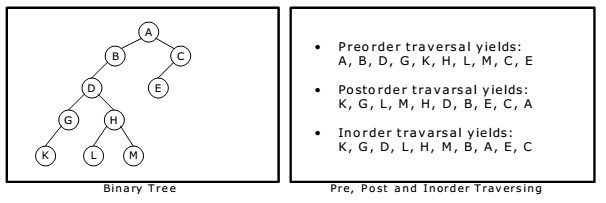

In [9]:
root = insert(None, 3)
insert(root, 5)
insert(root, 1)
insert(root, 7)
insert(root, 6)

print('Inorder traversal:')
inorder_bst(root)
print('\n')

new_root=remove(root, 3)
print(f'New root after removing 3: {new_root.val}')
print('Inorder traversal:')
inorder_bst(new_root)
print('\n')

print('BFS')
bfs_bst(root)

print('\nBFS with levels')
bfs_bst_with_levels(root)

Inorder traversal:
1
3
5
6
7


New root after removing 3: 5
Inorder traversal:
1
5
6
7


BFS
5
1
7
6

BFS with levels
--- Level: 0 ---
5
--- Level: 1 ---
1
7
--- Level: 2 ---
6


## Iterative traversals

For preorder and inorder traversals, both the stack and the tree itself are used to traverse the tree. With preorder, the additional information from the boolean `visited` makes using only ths stack possible.

In [3]:
from __future__ import annotations
from dataclasses import dataclass
from utils import validate_dfs_inorder, validate_dfs_preorder, validate_dfs_postorder, list_to_tree

@dataclass
class TreeNode:
    val: int
    left: TreeNode = None
    right: TreeNode = None

def dfs_inorder_recursive(root: TreeNode, traversal: None|list[int] = None) -> list[int]:
    traversal = [] if traversal is None else traversal
    if not root:
        return
    dfs_inorder_recursive(root.left, traversal)
    traversal.append(root.val)
    dfs_inorder_recursive(root.right, traversal)
    return traversal

def dfs_preorder_recursive(root: TreeNode, traversal: None|list[int] = None) -> list[int]:
    traversal = [] if traversal is None else traversal
    if not root:
        return
    traversal.append(root.val)
    dfs_preorder_recursive(root.left, traversal)
    dfs_preorder_recursive(root.right, traversal)
    return traversal

def dfs_postorder_recursive(root: TreeNode, traversal: None|list[int] = None) -> list[int]:
    traversal = [] if traversal is None else traversal
    if not root:
        return
    dfs_postorder_recursive(root.left, traversal)
    dfs_postorder_recursive(root.right, traversal)
    traversal.append(root.val)
    return traversal

def dfs_inorder_iterative(root: TreeNode) -> list[int]:
    stack, traversal = [], []
    current = root
    while stack or current:
        if current:
            stack.append(current)
            current = current.left
        else:
            current = stack.pop()
            traversal.append(current.val)
            current = current.right
    return traversal

def dfs_preorder_iterative(root: TreeNode) -> list[int]:
    stack, traversal = [root], []

    while stack:
        current = stack.pop()
        if current:
            traversal.append(current.val)
            stack.append(current.right)
            stack.append(current.left)

    return traversal

def dfs_postorder_iterative(root: TreeNode) -> list[int]:
    stack, traversal = [(root, False)], []

    while stack:
        current, visited = stack.pop()
        if current:
            if visited:
                traversal.append(current.val)
            else:
                stack.append((current, True))
                stack.append((current.right, False))
                stack.append((current.left, False))

    return traversal

def dfs_postorder_iterative_reverse(root: TreeNode) -> list[int]:
    stack, traversal = [], []
    current = root
    while stack or current:
        if current:
            traversal.append(current.val)
            if current.left:
                stack.append(current.left)
            current = current.right
        else:
            current = stack.pop()
    traversal.reverse()
    return traversal

validate_dfs_inorder(dfs_inorder_recursive)
validate_dfs_preorder(dfs_preorder_recursive)
validate_dfs_postorder(dfs_postorder_recursive)
validate_dfs_inorder(dfs_inorder_iterative)
validate_dfs_preorder(dfs_preorder_iterative)
validate_dfs_postorder(dfs_postorder_iterative)
validate_dfs_postorder(dfs_postorder_iterative_reverse)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1051664162.py, line 64)